### **MODULE 1: Data Loading & Quality Assessment**

**Pandas Concepts:**

- `pd.read_csv()`
- `.info()`, `.describe()`, `.shape`
- `.dtypes`, `.memory_usage()`
- `.isnull().sum()`, `.duplicated()`

1. Loaded the 785,741 job postings
2. Generate data quality report showing:
    - Missing value percentages per column
    - Data types verification
    - Duplicate detection
    - Memory usage analysis
3. Create initial data profile statistics

In [171]:
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


### Missing value percentages per column

In [19]:
list_of_columns     = (list(df.columns))

for column in list_of_columns:
    missed_values_count = df[column].isna().sum()
    total_values        = df[column].size   
    print(f"{column}: {(missed_values_count/total_values )}%")

job_title_short: 0.0%
job_title: 1.2726823817487164e-06%
job_location: 0.0013299530889274087%
job_via: 1.0181459053989731e-05%
job_schedule_type: 0.016121067729610992%
job_work_from_home: 0.0%
search_location: 0.0%
job_posted_date: 0.0%
job_no_degree_mention: 0.0%
job_health_insurance: 0.0%
job_country: 6.236143670568711e-05%
salary_rate: 0.9579149390003334%
salary_year_avg: 0.9719958968720013%
salary_hour_avg: 0.9864293877634135%
company_name: 2.2908282871476898e-05%
job_skills: 0.14895092791272455%
job_type_skills: 0.14895092791272455%


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'salary_hour_avg'),
  Text(1, 0, 'salary_year_avg'),
  Text(2, 0, 'salary_rate'),
  Text(3, 0, 'job_type_skills'),
  Text(4, 0, 'job_skills'),
  Text(5, 0, 'job_schedule_type'),
  Text(6, 0, 'job_location'),
  Text(7, 0, 'job_country'),
  Text(8, 0, 'company_name'),
  Text(9, 0, 'job_via'),
  Text(10, 0, 'job_title'),
  Text(11, 0, 'job_title_short'),
  Text(12, 0, 'job_health_insurance'),
  Text(13, 0, 'job_posted_date'),
  Text(14, 0, 'search_location'),
  Text(15, 0, 'job_work_from_home'),
  Text(16, 0, 'job_no_degree_mention')])

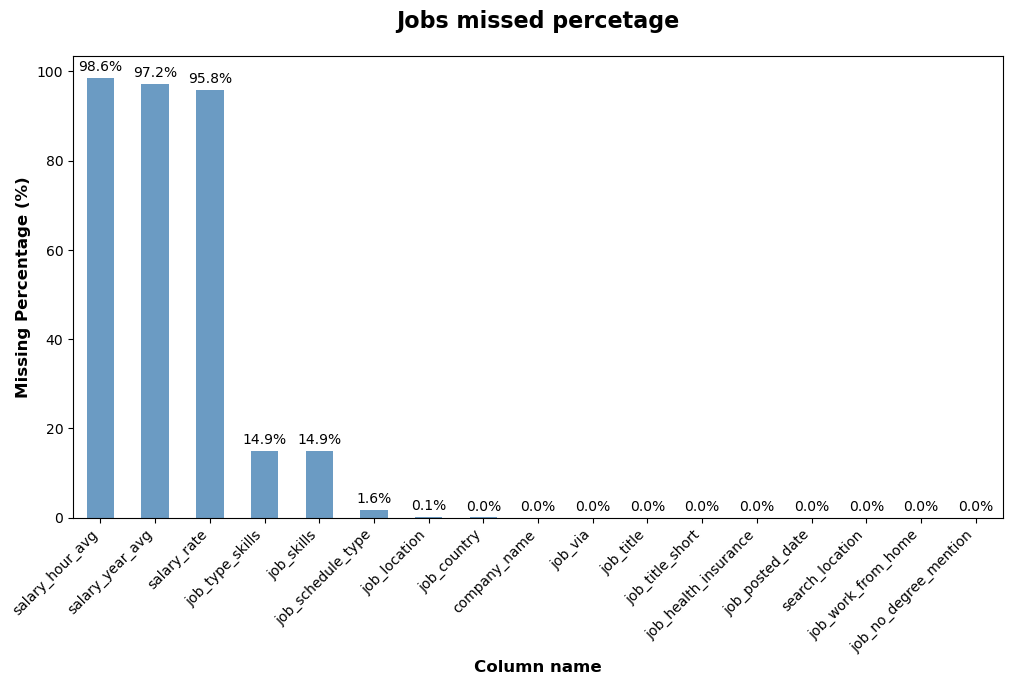

In [172]:
df.loc['Missed values percentage'] = (df.isna().sum() / len(df)) * 100 
missed_percentages = df.loc['Missed values percentage'].copy()
df.drop("Missed values percentage", inplace=True)
missed_percentages.sort_values(ascending=False, inplace=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title("Jobs missed percetage", fontsize = 16, fontweight='bold', pad=20)
plt.xlabel("Column name", fontsize = 12, fontweight='bold')
plt.ylabel("Missing Percentage (%)", fontsize = 12, fontweight ='bold')
ax = missed_percentages.plot(kind="bar", color = 'steelblue', alpha=0.8)
ax.bar_label(
    ax.containers[0],
    labels=[f"{v:.1f}%" for v in missed_percentages],
    padding=3
)

plt.xticks(rotation=45, ha='right')

In [173]:
df['job_posted_date'] = pd.to_datetime(df["job_posted_date"], errors="coerce")
df['job_work_from_home'] = df['job_work_from_home'].astype(bool)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  object        
 9   job_health_insurance   785741 non-null  object        
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   float64  

In [174]:
print(df.duplicated().sum())
df[df.duplicated(keep=False)]
print(len(df))

101
785741


In [175]:
df.drop_duplicates(inplace=True)

In [176]:
print(len(df))

785640


In [177]:
df.info()
df.to_csv("data_jobs", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 785640 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785640 non-null  object        
 1   job_title              785639 non-null  object        
 2   job_location           784595 non-null  object        
 3   job_via                785632 non-null  object        
 4   job_schedule_type      772975 non-null  object        
 5   job_work_from_home     785640 non-null  bool          
 6   search_location        785640 non-null  object        
 7   job_posted_date        785640 non-null  datetime64[ns]
 8   job_no_degree_mention  785640 non-null  object        
 9   job_health_insurance   785640 non-null  object        
 10  job_country            785591 non-null  object        
 11  salary_rate            33066 non-null   object        
 12  salary_year_avg        22002 non-null   float64  